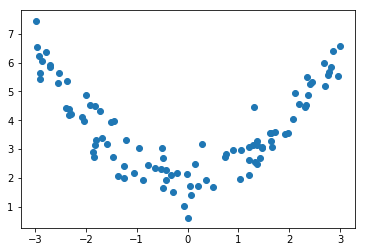

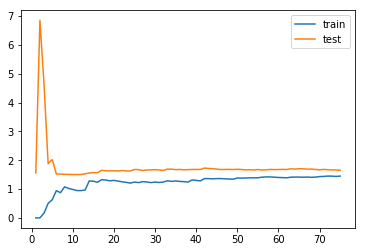

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + 0*x + 2 + np.random.normal(0,0.5,size=100)

plt.scatter(x, y)
plt.show()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
train_score = []
test_score = []
for i in range(1,76):#分别用i个数据训练，将训练出的测试数据分别对训练数据和测试数据的准确度输入矩阵里
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i],y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i]) 
    train_score.append(mean_squared_error(y_train[:i],y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test,y_test_predict))
    
plt.plot([i for i in range(1,76)],np.sqrt(train_score),label='train')#取方均根误差，值更小
plt.plot([i for i in range(1,76)],np.sqrt(test_score),label='test')
plt.legend()#显示图例
plt.show()

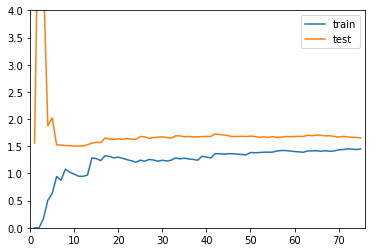

In [36]:
#定义函数，使用线性回归
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):#algo机器学习算法种类
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()
    
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

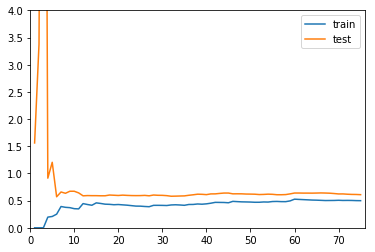

In [37]:
#使用多项式回归
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

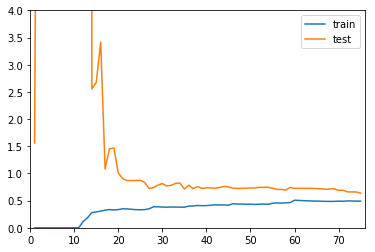

In [38]:
#使用多项式回归，过拟合
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(degree=10)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)